# Building Machine Learning Model for Predicting Heart Disease

In this notebook we are going to apply Python based machine learning libraries to build a model capable of predicting if a person has heart disease or not based on their medical information.

Road map step by step:

#Step 1: Defining the problem
> Based on the attributes provided can we predict if the patient have heart-disease or not.

#Step 2: Data
> The original source of data is from UCI Machine Learning Repositary.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

> We have downloaded the data from kaggle.
Source: https://www.kaggle.com/ronitf/heart-disease-uci

#Step 3: Evaluation
> Our bentch mark for this model is to achieve atleast 95% accuracy to pursue the project further

#Step 4: Features
Information of all the data attributes with proper classification.
1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

#Step 5: Data Modelling
#Step 6: Experimentation


## Let's get our tools ready

We are going to use numpy, pandas and matplotlib for data analysis and manipulation

In [84]:
# Importing all the tools we are going to use

# Libraries for Exploratory Data Analysis (EDA) & plotting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# helps us in plotting our plots inside the notebook
%matplotlib inline 

#Model building using Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Tools for Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



##Loading Data into notebook

In [8]:
data = pd.read_csv("heart-disease.csv")
data.shape

(303, 14)

## EDA(Exploratory Data Analysis) of imported data

In depth knowledge of data and understanding the subject matter expert

1. What questions are we trying to solve?
2. What type of data do we have and how do we trest different types?
3. What is missing deom the data and how do you deal with them?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?



In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
#How many types of classified classes in the target
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

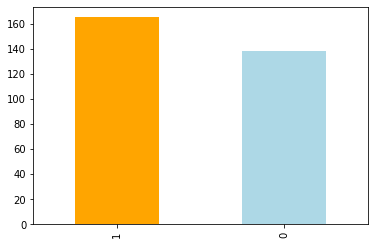

In [22]:
data["target"].value_counts().plot(kind="bar", color = ["orange", "lightblue"]);


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
#Checking missing values
data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Heart Disease Frequency according to sex

In [31]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [32]:
# Compare target column with sex column
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


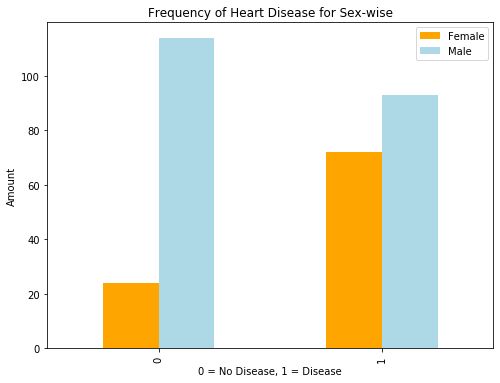

In [43]:
#Create a plot of cross tab
pd.crosstab(data.target, data.sex).plot(kind = "bar",
                                       figsize=(8,6),
                                       color=["orange", "lightblue"])
plt.title("Frequency of Heart Disease for Sex-wise")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

In [48]:
# Finding the uniques values in column
data["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

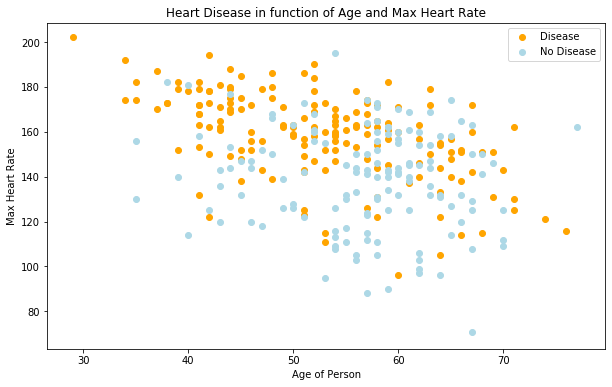

In [53]:
#Creating figure
plt.figure(figsize=(10,6))

#Creating scatter plot for positive heart disease
plt.scatter(data.age[data.target ==1],
           data.thalach[data.target==1],
           c="orange")
#Scatter with negative heart disease
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c="lightblue");

#Labelling the graph
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age of Person")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

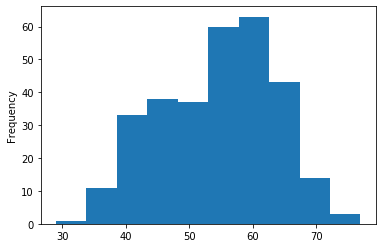

In [57]:
#Histogram of age to get distribution
data.age.plot.hist();


### Heart Disease Frequency per chest Pain Type
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [58]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


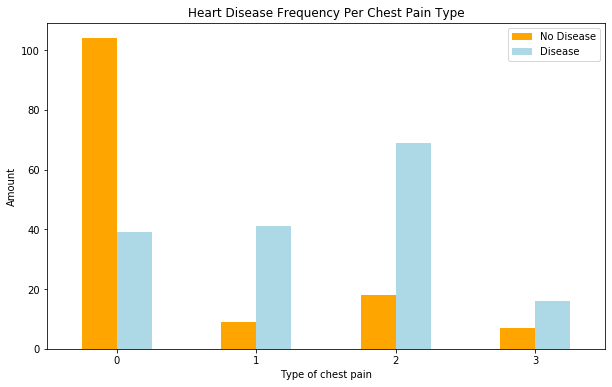

In [88]:
#Making the crosstab into visual to understand pattern
pd.crosstab(data.cp, data.target).plot(kind="bar",
                                      figsize=(10,6),
                                      color=["orange", "lightblue"])

#Labelling the graph
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Type of chest pain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [82]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
# Making Correlation Matrix

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

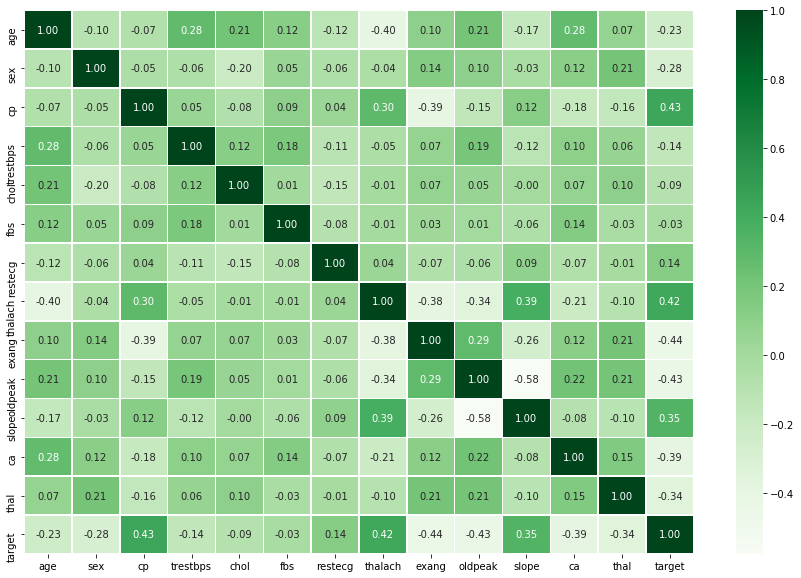

In [80]:
#Graphical view of correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths = 0.5,
                fmt= ".2f",
                cmap="Greens");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

## 5. Modelling

In [89]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
# Split data into X & y
X = data.drop("target", axis = 1)

y = data["target"]

In [92]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [94]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [95]:
#Split data into train and test sets
np.random.seed(42)

#Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [98]:
y_train,len(y_test)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64, 61)

Now we have got our data split into training and test sets, it's time to build a machine learninng model

we'll train it find the patterns on the training set

we'll test it use the patters on the test set.

we are going to try 3 different machine leaning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [100]:
#Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-learn machine learning models
    X_train: training data(no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [102]:
model_scores = fit_and_score(models=models,
                            X_train= X_train,
                            X_test= X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

/Users/ayushjain/Desktop/sample_project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision

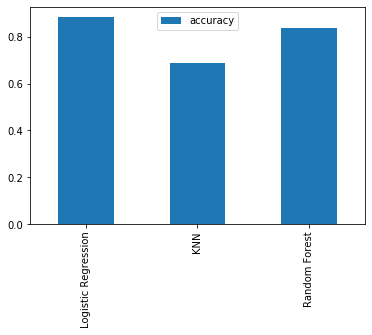

In [104]:
model_compare = pd.DataFrame(model_scores, index= ["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know a model's first predictions are not always what we should based our next steps off.

what should we do?

Let's look at foloowings:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross- validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve(AUC)

HyperParameter Tuning


In [106]:
#Lets tune KNN

train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [107]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [108]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


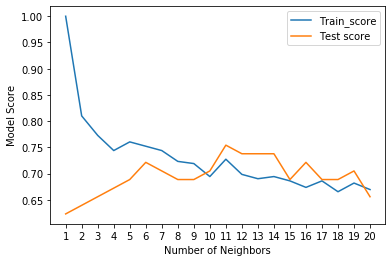

In [112]:
#Visualizing results
plt.plot(neighbors, train_scores, label = "Train_score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:0.2f}%")

## Hyper Parameter Tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [123]:
#Create a hyperparameter grid for logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Now we have got hyperparameter grids for each of ours models, lets tune them uing RandomisedSerch CV

In [124]:
#Tune Logistic Regression

np.random.seed(42)

#Setup random hyper parameter search for logistics Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose=True)

#Fit random hyper parameter search model for logisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [125]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [126]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we have tuned Logistic Regression(), Lets do the same for RandomForestClassifier()

In [127]:
#Tune RondomForest Classifier
np.random.seed(42)

#Setup random hyper parameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions = rf_grid,
                        cv=5,
                        n_iter = 20,
                          verbose = True)

#Fit random hyper paramter search model for RanodmForest Classsifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   54.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [130]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_depth': None}

In [132]:
rs_rf.score(X_test, y_test)

0.9016393442622951

In [134]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyper parameter tuningh wth Grid Search Cv

Since our LogisticRegression model provids the best scores so far, we will try and improve them again using GridSearch CV

In [137]:
#Different hyper paraeters for our LogisticRegression Model

log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#Setup grid hyperparameter search for logisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose= True)

#Fit grid hyper parameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


In [139]:
#Check the best hyperparameter\
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [140]:
#Evalutae the grid search logistic Regression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

it would be good if cross-validation was used where possible

To make comparisions and evaluate our trained model, first we need to make predictions


In [144]:
#Making predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [145]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [146]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

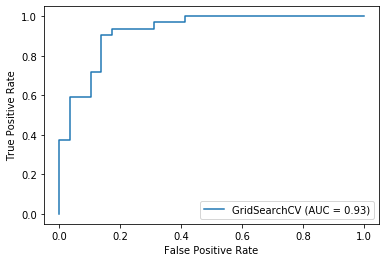

In [148]:
#Plot ROC curve and calculate and also calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [149]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


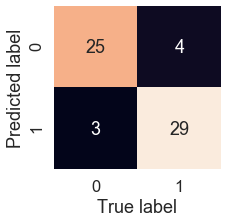

In [150]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    """
    Plots a nice looking confusion matrix using seabirn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds),
                  annot = True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we have to get classification report as well as cross validated 
precision, recall, and f1-score

In [152]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculate evaluation metrics using cross validations

We are going to calculate precision, recall and f1 score of our model using cross- validation and to do we'll be suing cross_val_score()

In [155]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [156]:
#Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [169]:
#Cross-validated accuracy

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [170]:
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [172]:
#Cross-validated precision
cv_precision = cross_val_score(clf, X,
                              y, cv = 5,
                              scoring = "precision")

cv_precision= cv_precision.mean()
cv_precision

0.8207936507936507

In [173]:
#Cross-validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring = "recall")
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [175]:
#Cross- validated f1 score
cv_f1 = cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring = "f1")
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

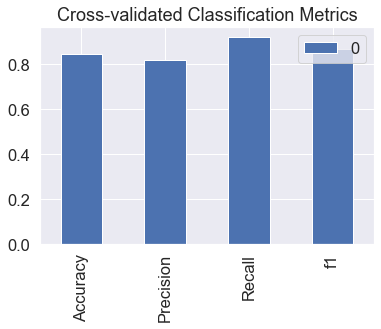

In [178]:
# Visualize cross- validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "f1" : cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title = "Cross-validated Classification Metrics");

## Feature Importance

Feature importance is another as asking, which features contributed most to the outscomes of the models and how they contribute.

Finding feature importance is different for each machine learning model.One way to find feature importance is to search for"(Model Name) feature importance".

Lets find the feature importance for our Logistic Regression Model..


In [181]:
#Fit an instance of Logistic Regression
gs_log_reg.best_params_


clf = LogisticRegression(C= 0.20433597178569418,
                        solver = "liblinear")
clf.fit(X_train, y_train);

In [184]:
#Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [186]:
#Match coef's of features to columns
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

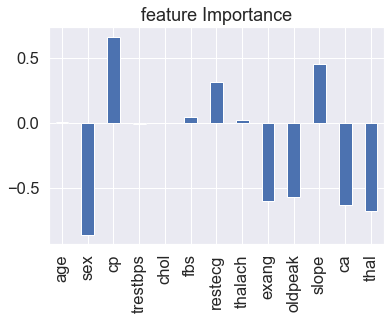

In [187]:
#Visualize feature importance
feature_data = pd.DataFrame(feature_dict, index = [0])
feature_data.T.plot.bar(title = "feature Importance", legend = False);

In [188]:
pd.crosstab(data["sex"], data["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [191]:
pd.crosstab(data["slope"], data["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart